<a href="https://colab.research.google.com/github/a-s-g93/brain_tumor_nn/blob/main/brain_tumor_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **imports**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

import random
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

import os

# loading data

## creating the full dataframe

loading the data

In [ ]:
# filepaths = []
# labels= []
# dict_list = [tumor_path, healthy_path]
# for i, j in enumerate(dict_list):
#     flist=os.listdir(j)
#     for f in flist:
#         fpath=os.path.join(j,f)
#         filepaths.append(fpath)
#         if i==0:
#           labels.append('cancer')
#         else:
#           labels.append('healthy') 
    
# Fseries = pd.Series(filepaths, name="filepaths")
# Lseries = pd.Series(labels, name="labels")
# data = pd.concat([Fseries,Lseries], axis=1)
# df = pd.DataFrame(data)

# print(df["labels"].value_counts())
# print('data shape: ', df.shape)
# df.head()

bounding box coordinates were created in batches of 100. so last 13 cancer files were not included. we'll discard them.

In [ ]:
# df.drop(labels = range(2500, 2513), inplace = True)
# df.reset_index(inplace=True, drop=True)
# print('data shape: ', df.shape)

In [ ]:
# full_img_array = []

# for index, row in df.iterrows():
#     img = keras.preprocessing.image.load_img(df.loc[index]['filepaths'], color_mode='grayscale', target_size=(128,128))
#     img_arr = keras.preprocessing.image.img_to_array(img)

#     full_img_array.append(img_arr)

In [ ]:
# np.array(full_img_array).shape

In [ ]:
# img_df = pd.DataFrame(np.array(full_img_array).reshape(4587, 128*128))
# img_df.head()

In [ ]:
# bb = pd.read_csv('/content/drive/My Drive/ECE539_project/data/mri_data_localizer/data_df.csv')
# bb.head()

In [ ]:
# bb_healthy = pd.DataFrame(np.zeros([2087, 4]))
# bb_healthy.columns = bb.columns
# bb_healthy.head()

In [ ]:
# bb = bb.append(bb_healthy)
# bb.reset_index(inplace=True, drop=True)
# print(bb.shape)
# bb.head()

In [ ]:
# bb = bb / 128 # scale data

In [ ]:
# print(df.shape)
# print(bb.shape)

combine the image dataframe with the coordinate dataframe

In [ ]:
# df = df.join(bb)
# print(df.shape)
# df.head()

In [ ]:
# df['labels'].replace('cancer', 1, inplace=True)
# df['labels'].replace('healthy', 0, inplace=True)

In [ ]:
# df.head()

In [ ]:
# labels_oh = pd.get_dummies(df['labels'])
# labels_oh.columns = ['healthy', 'cancer']
# df = df.join(labels_oh)
# df.drop(columns='labels', inplace=True)
# df.head()                           

In [ ]:
# full_df = img_df.join(bb).join(df[['healthy', 'cancer']])
# full_df.head()

In [ ]:
# # correct wrong scaling from before
# full_df[['x1', 'y1', 'x2', 'y2']] = full_df[['x1', 'y1', 'x2', 'y2']] * 255 / 128
# full_df.head()

In [ ]:
# full_df.shape

In [ ]:
# full_df.to_csv('/content/drive/My Drive/ECE539_project/data/full_data.csv', columns=full_df.columns)

load dataframe of all image data (grayscale, 128x128), scaled coordinates (128), tumor / healthy one hot 

In [ ]:
# full_df = pd.read_csv('/content/drive/My Drive/ECE539_project/data/full_data.csv', index_col=0)
# print(full_df.shape)
# full_df.head()

In [ ]:
# bb = pd.read_csv('/content/drive/My Drive/ECE539_project/data/mri_data_localizer/data_df.csv') / 128
# bb.head()

In [ ]:
# bb_healthy = pd.DataFrame(np.zeros([2087, 4]))
# bb_healthy.columns = bb.columns
# bb = bb.append(bb_healthy)
# bb.reset_index(inplace=True, drop=True)
# print(bb.shape)
# bb.head()

In [ ]:
# full_df[['x1', 'y1', 'x2', 'y2']] = bb
# full_df.rename(columns={'x1': 'x_corner', 'y1': 'y_corner', 'x2':'width', 'y2':'height'}, inplace=True)
# full_df.head()

In [ ]:
# full_df.isnull()

In [ ]:
# full_df = full_df[full_df['cancer'] == 0]

In [ ]:
# cancer = pd.read_csv('/content/drive/My Drive/ECE539_project/data/mri_data_localizer/image_df.csv')
# cancer.head()

In [ ]:
# bb = bb / 128

In [ ]:
# cancer = cancer.join(bb)
# cancer.rename(columns={'corner_x': 'x_corner', 'corner_y':'y_corner'}, inplace=True)
# cancer.head()

In [ ]:
# cancer['healthy'] = 0
# cancer['cancer'] = 1
# cancer.head()

In [ ]:
# full_df = pd.concat([cancer, full_df], axis=0)
# full_df.reset_index(inplace=True, drop=True)
# print(full_df.shape)
# full_df.head()

In [ ]:
# full_df.to_csv('/content/drive/My Drive/ECE539_project/data/full_data.csv', columns=full_df.columns)

## loading the full dataframe

In [ ]:
full_df = pd.read_csv('/content/drive/My Drive/ECE539_project/data/full_data.csv', index_col=0)
print(full_df.shape)
full_df.head()

(4587, 16390)


0    1    2    3    4    5    6    7    8    9  ...  16380  16381  16382  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   16383  x_corner  y_corner     width    height  healthy  cancer  
0    0.0  0.671875  0.078125  0.171875  0.203125        0       1  
1    0.0  0.703125  0.437500  0.125000  0.164062        0       1  
2    0.0  0.515625  0.250000  0.257812  0.218750        0       1  
3    0.0  0.476562  0.234375  0.273438  0.250000        0       1  
4    0.0  0.257812  0.234375  0.281250  0.242188        0       1  

[5 rows x 16390 columns]

In [ ]:
images = full_df.drop(columns=['x_corner', 'y_corner', 'width', 'height', 'cancer', 'healthy']) / 255
images.head()

0    1    2    3    4    5    6    7    8    9  ...  16374  16375  16376  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   16377  16378  16379  16380  16381  16382  16383  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 16384 columns]

In [ ]:
# xy = (full_df.loc[2]['x_corner']*128, full_df.loc[2]['y_corner']*128) 
# width = full_df.loc[2]['width'] * 128
# height = full_df.loc[2]['height'] * 128

# img = np.array(images.loc[2]).reshape(128,128) * 255
# rect = matplotlib.patches.Rectangle(xy, width, height, linewidth=1, edgecolor='r', facecolor='none')

# plt.imshow(img, cmap='gray')
# plt.gca().add_patch(rect)

# plt.xticks([])
# plt.yticks([])
# plt.show()

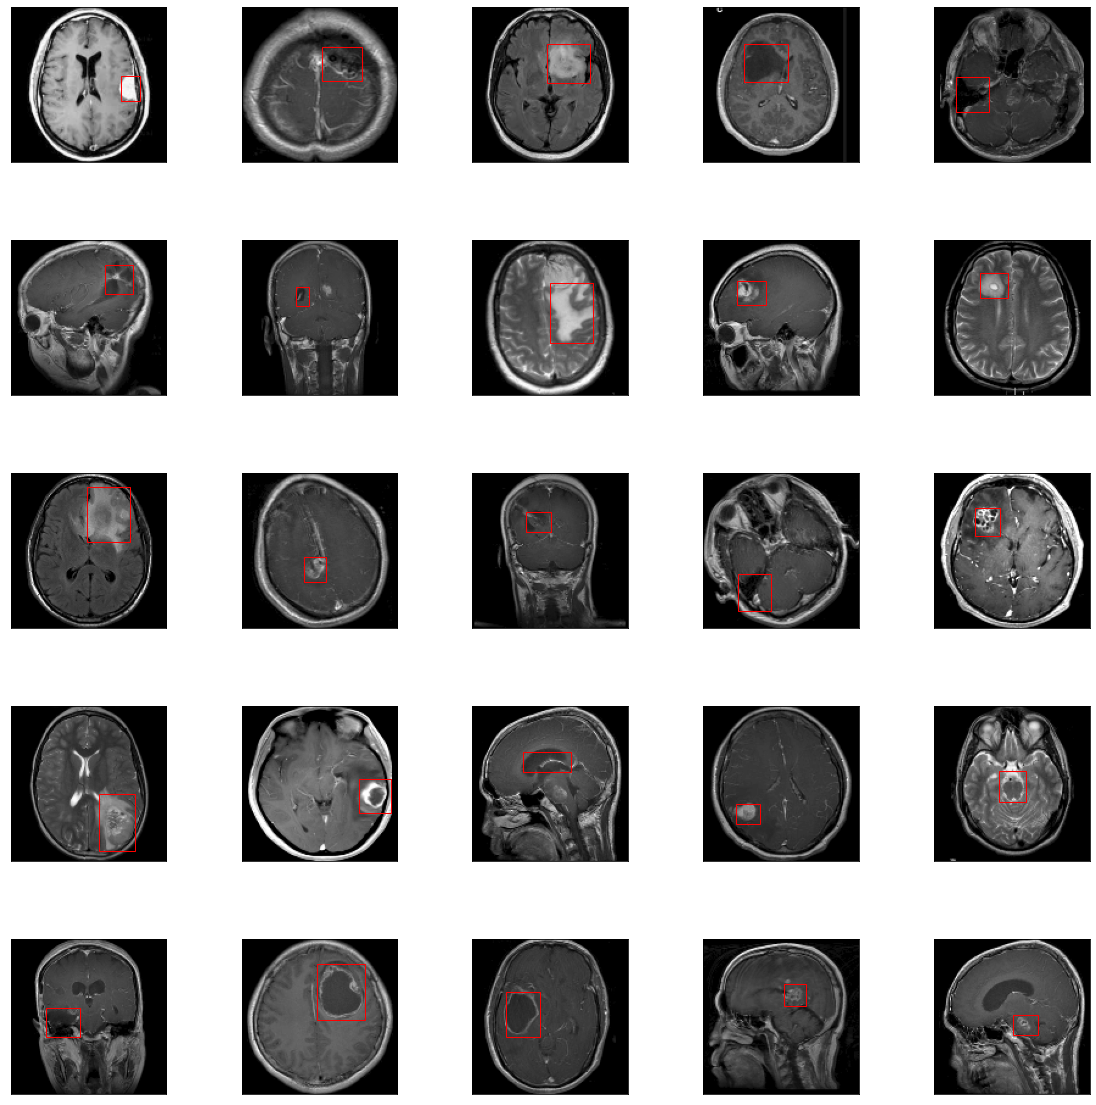

In [ ]:
fig = plt.figure(figsize=[20, 20])
fig.patch.set_facecolor('white')
for i in range(1, 26):
    plt.subplot(5, 5, i)
    rand_pick = random.randint(1, 950)
    random_img = str(rand_pick)

    xy = (full_df.loc[i]['x_corner']*128, full_df.loc[i]['y_corner']*128)
    width = full_df.loc[i]['width'] * 128
    height = full_df.loc[i]['height'] * 128

    img = np.array(images.loc[i]).reshape(128,128) * 255
    rect = matplotlib.patches.Rectangle(xy, width, height, linewidth=1, edgecolor='r', facecolor='none')

    plt.imshow(img, cmap='gray')
    plt.gca().add_patch(rect)

    plt.xticks([])
    plt.yticks([])

    # plt.xlabel('Cancer (' + str(random_img) + ').jpg', fontsize=14)
fig.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
t = ['x_corner', 'y_corner', 'width', 'height', 'cancer', 'healthy']

In [ ]:
classes = ['healthy', 'tumor']

we will need to train the classifier on both healthy and tumor scans. 

we will need to train the localizer on only tumor scans so that the dummy coordinates dont skew the data.

this requires different training / val groups for each section.


In [ ]:
temp_full, test_full = train_test_split(full_df, train_size = 0.8, random_state=123)
train_full, val_full = train_test_split(temp_full, train_size=0.8, random_state=123)

In [ ]:
tumors = full_df[full_df['cancer'] == 1]
tumors.shape

(2500, 16390)

In [ ]:
temp_tumors, test_tumors = train_test_split(tumors, train_size = 0.8, random_state=123)
train_tumors, val_tumors = train_test_split(temp_tumors, train_size=0.8, random_state=123)

In [ ]:
# classification
print('train size:', train_full.shape)
print('val size: ', val_full.shape)
print('test size: ', test_full.shape)

train size: (2935, 16390)
val size:  (734, 16390)
test size:  (918, 16390)


In [ ]:
# localization
print('train size:', train_tumors.shape)
print('val size: ', val_tumors.shape)
print('test size: ', test_tumors.shape)

train size: (1600, 16390)
val size:  (400, 16390)
test size:  (500, 16390)


In [ ]:
loader_targets = list(full_df.columns[-6:])
loader_targets

['x_corner', 'y_corner', 'width', 'height', 'healthy', 'cancer']

In [ ]:
# classification

train_full_labels = np.array(train_full[loader_targets[4:]])
train_full_bb = np.array(train_full[loader_targets[:4]]).astype(np.float32)

val_full_labels = np.array(val_full[loader_targets[4:]])
val_full_bb = np.array(val_full[loader_targets[:4]]).astype(np.float32)

test_full_labels = np.array(test_full[loader_targets[4:]])
test_full_bb = np.array(test_full[loader_targets[:4]]).astype(np.float32)

In [ ]:
val_full_bb

array([[0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       ...,
       [0.2734375, 0.109375 , 0.296875 , 0.40625  ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.328125 , 0.625    , 0.1796875, 0.140625 ]], dtype=float32)

In [ ]:
# localization

train_tumors_labels = np.array(train_tumors[loader_targets[4:]])
train_tumors_bb = np.array(train_tumors[loader_targets[:4]]).astype(np.float32)

val_tumors_labels = np.array(val_tumors[loader_targets[4:]])
val_tumors_bb = np.array(val_tumors[loader_targets[:4]]).astype(np.float32)

test_tumors_labels = np.array(test_tumors[loader_targets[4:]])
test_tumors_bb = np.array(test_tumors[loader_targets[:4]]).astype(np.float32)

In [ ]:
print(test_full_bb.shape)
print(test_full_labels.shape)

print(train_full_bb.shape)
print(train_full_labels.shape)

(918, 4)
(918, 2)
(2935, 4)
(2935, 2)


In [ ]:
def df_to_images(x):
  x = x.drop(columns=t)
  d = x.shape
  x = np.array(x)
  x = x.reshape(d[0], 128, 128, 1)
  print(x.shape)
  return x

In [ ]:
# classification

train_full = df_to_images(train_full)
val_full = df_to_images(val_full)
test_full = df_to_images(test_full)

(2935, 128, 128, 1)
(734, 128, 128, 1)
(918, 128, 128, 1)


In [ ]:
# localization

train_tumors = df_to_images(train_tumors)
val_tumors = df_to_images(val_tumors)
test_tumors = df_to_images(test_tumors)

(1600, 128, 128, 1)
(400, 128, 128, 1)
(500, 128, 128, 1)


In [ ]:
# image_gen = ImageDataGenerator(rescale = 1/255, fill_mode='nearest', horizontal_flip=True)

In [ ]:
# classification

trainFullTargets = {
    "cl_head": train_full_labels,
    "bb_head": train_full_bb
}
valFullTargets = {
    "cl_head": val_full_labels,
    "bb_head": val_full_bb
}
testFullTargets = {
    "cl_head": test_full_labels,
    "bb_head": test_full_bb
}

In [ ]:
train_full_labels.shape

(2935, 2)

In [ ]:
# localization

trainTumorsTargets = {
    "cl_head": train_tumors_labels,
    "bb_head": train_tumors_bb
}
valTumorsTargets = {
    "cl_head": val_tumors_labels,
    "bb_head": val_tumors_bb
}
testTumorsTargets = {
    "cl_head": test_tumors_labels,
    "bb_head": test_tumors_bb
}

In [ ]:
# train = image_gen.flow_from_dataframe(dataframe= train,x_col="filepaths", y_cols=targets,
#                                       target_size=(128,128),
#                                       color_mode='grayscale',
#                                       class_mode='categorical', 
#                                       batch_size=32,
#                                       shuffle=False            #do not shuffle data
#                                      )
# test = image_gen.flow_from_dataframe(dataframe= test,x_col="filepaths", y_cols=targets,
#                                      target_size=(128,128),
#                                      color_mode='grayscale',
#                                      class_mode='categorical',
#                                      batch_size=32,
#                                      shuffle= False
#                                     )
# val = image_gen.flow_from_dataframe(dataframe= val,x_col="filepaths", y_cols=targets,
#                                     target_size=(128,128),
#                                     color_mode= 'grayscale',
#                                     class_mode='categorical',
#                                     batch_size=32,
#                                     shuffle=False
#                                    )

# model architecture and training (training no longer needed)

In [ ]:
from keras import layers
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
# input layer
input = tf.keras.layers.Input(shape=(128,128,1), name='input')

# convolution layers
base = layers.Rescaling(1./255, name='rescale_layer')(input)

base = Conv2D(filters=32, name='b_1', kernel_size=3, activation="relu", padding="same")(base)
base = MaxPool2D(name='b_2')(base)

base = Conv2D(filters=64, name='b_3', kernel_size=3, activation="relu", padding="same")(base)
base = MaxPool2D(name='b_4')(base)

base = Flatten(name='b_5')(base)


# classification layers
classifier = (layers.Dense(32, name='cl_1', activation='relu'))(base)
classifier = (layers.BatchNormalization(name='cl_2'))(classifier)
classifier = (layers.Dropout(rate=0.3, name='cl_3'))(classifier)

classifier = (layers.Dense(16, name='cl_4', activation="relu"))(classifier)
classifier = (layers.BatchNormalization(name='cl_5'))(classifier)
classifier = (layers.Dropout(rate=0.3, name='cl_6'))(classifier)

classifier = (layers.Dense(2, name='cl_head', activation="sigmoid"))(classifier)


# localization layers
localizer = layers.Dense(128, activation='relu', name='bb_1')(base)
localizer = layers.Dense(64, activation='relu', name='bb_2')(localizer)
localizer = layers.Dense(32, activation='relu', name='bb_3')(localizer)
localizer = layers.Dense(4, activation='sigmoid', name='bb_head')(localizer)

In [ ]:
model = tf.keras.models.Model(inputs=input, outputs=[classifier, localizer])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 rescale_layer (Rescaling)      (None, 128, 128, 1)  0           ['input[0][0]']                  
                                                                                                  
 b_1 (Conv2D)                   (None, 128, 128, 32  320         ['rescale_layer[0][0]']          
                                )                                                                 
                                                                                              

In [ ]:
class_layers = model.layers[7], model.layers[8], model.layers[9], model.layers[10], model.layers[12], model.layers[14], model.layers[16]

In [ ]:
loc_layers = model.layers[11], model.layers[13], model.layers[15], model.layers[17]

In [ ]:
base_layers = model.layers[2], model.layers[3], model.layers[4], model.layers[5]

In [ ]:
losses = {"cl_head":tf.keras.losses.BinaryCrossentropy(), 
          "bb_head":tf.keras.losses.MSE}

metrics = {"cl_head":"accuracy", 
          "bb_head":"accuracy"}

In [ ]:
model.compile(optimizer=Adam(0.001), loss = losses, metrics=metrics)

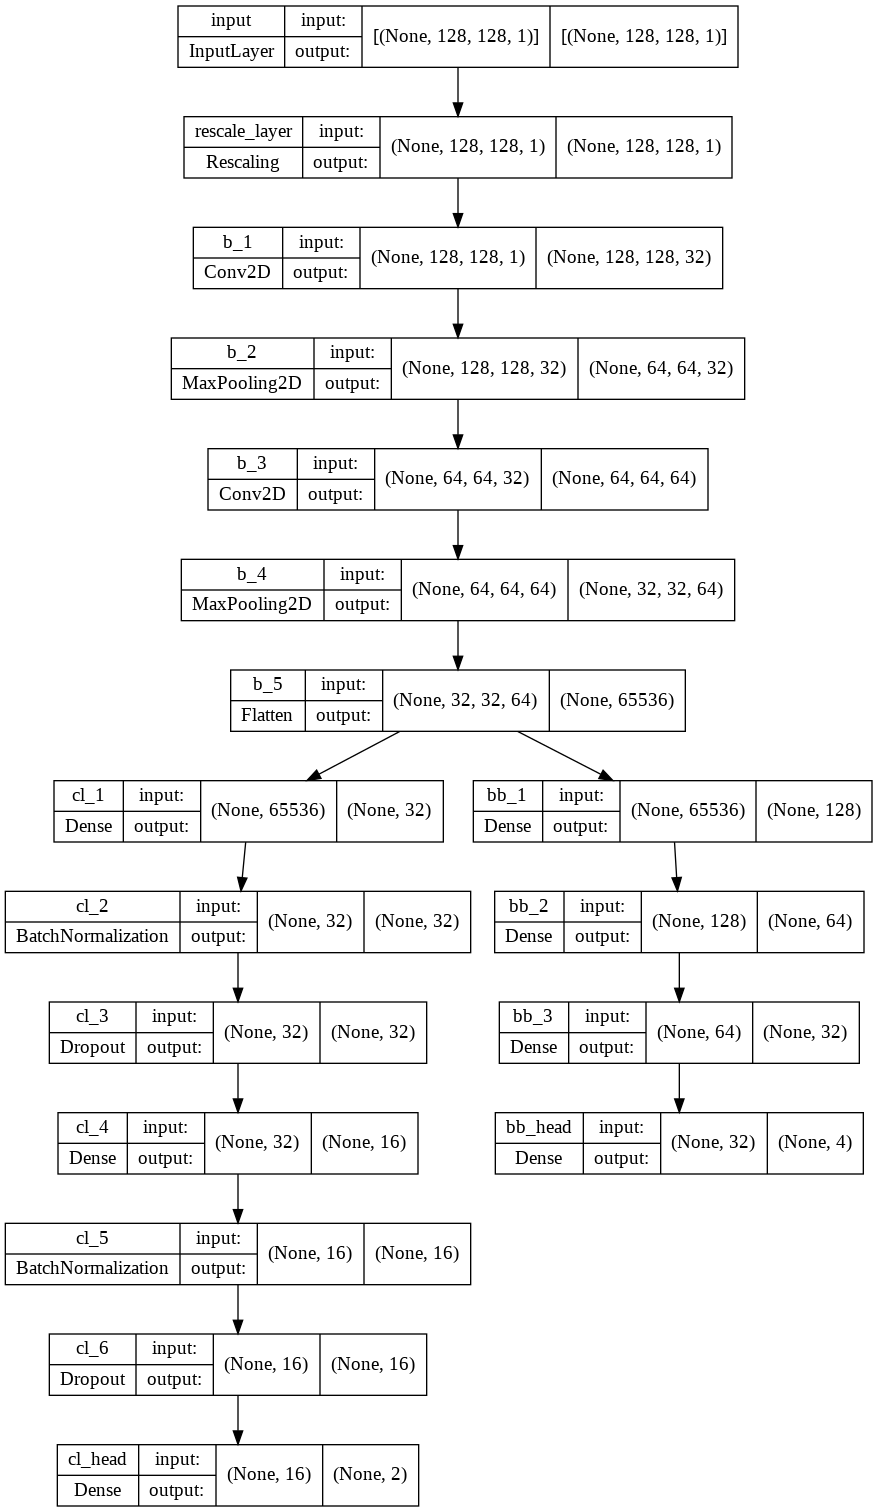

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='/content/drive/My Drive/ECE539_project/data/figures/model.png')

In [ ]:
early_stop_cl = tf.keras.callbacks.EarlyStopping(monitor='val_cl_head_loss', patience=5, restore_best_weights=True)
early_stop_bb = tf.keras.callbacks.EarlyStopping(monitor='val_bb_head_loss', patience=5, restore_best_weights=True)

Train the model base and localization layers

In [ ]:
# FREEZE CLASSIFICATION WEIGHTS
# UNFREEZE LOCALIZATION WEIGHTS
# FREEZE BASE WEIGHTS

for layer in class_layers:
  layer.trainable = False

for layer in loc_layers:
  layer.trainable = True

for layer in base_layers:
  layer.trainable = True

In [ ]:
# History_loc = model.fit(train_tumors, trainTumorsTargets, validation_data=(val_tumors, valTumorsTargets), 
#                     callbacks=early_stop_bb, epochs=50, batch_size=128,verbose=1)

train the model classification layers


In [ ]:
# UNFREEZE CLASSIFICATION WEIGHTS
# FREEZE LOCALIZATION WEIGHTS
# UNFREEZE BASE WEIGHTS

for layer in class_layers:
  layer.trainable = True

for layer in loc_layers:
  layer.trainable = False

for layer in base_layers:
  layer.trainable = False

In [ ]:
# History_class = model.fit(train_full, trainFullTargets, validation_data=(val_full, valFullTargets), 
#                     callbacks=early_stop_cl, epochs=50, batch_size=128,verbose=1)

saving model and history

In [ ]:
# model.save('/content/drive/My Drive/ECE539_project/model/updated_model')

In [ ]:
# import json
# # Get the dictionary containing each metric and the loss for each epoch
# History_loc_dict = History_loc.history
# # Save it under the form of a json file
# json.dump(History_loc_dict, open('/content/drive/My Drive/ECE539_project/model/updated_model/history_loc', 'w'))

# # Get the dictionary containing each metric and the loss for each epoch
# History_class_dict = History_class.history
# # Save it under the form of a json file
# json.dump(History_class_dict, open('/content/drive/My Drive/ECE539_project/model/updated_model/history_class', 'w'))

# load presaved model and histories

load presaved model and history

In [ ]:
import json

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/ECE539_project/model/updated_model')

In [ ]:
history_loc_dict = json.load(open('/content/drive/My Drive/ECE539_project/model/updated_model/history_loc', 'r'))
history_class_dict = json.load(open('/content/drive/My Drive/ECE539_project/model/updated_model/history_class', 'r'))

# bounding box visualization + start eval

---



In [ ]:
import matplotlib

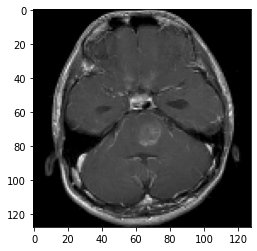

In [ ]:
plt.imshow(val_tumors[0].reshape(128,128), cmap='gray')

In [ ]:
# 'x_corner', 'y_corner', 'width', 'height'

In [ ]:
val_full_pred = model.predict(val_full)

In [ ]:
train_full_pred = model.predict(train_full)

In [ ]:
test_full_pred = model.predict(test_full)

In [ ]:
test_tumor_pred = model.predict(test_tumors)

NameError: ignored

In [ ]:
confusion_matrix(np.argmax(train_full_labels, axis=1), np.argmax(train_full_pred[0], axis=1))

array([[1337,    0],
       [   0, 1598]])

In [ ]:
confusion_matrix(np.argmax(val_full_labels, axis=1), np.argmax(val_full_pred[0], axis=1))

array([[332,   7],
       [  9, 386]])

In [ ]:
confusion_matrix(np.argmax(test_full_labels, axis=1), np.argmax(test_full_pred[0], axis=1))

array([[403,   8],
       [ 10, 497]])

plot the bounding boxes of some validation set images

red: original bb

blue: predicted bb

In [ ]:
plt.style.use("seaborn-darkgrid")

([], <a list of 0 Text major ticklabel objects>)

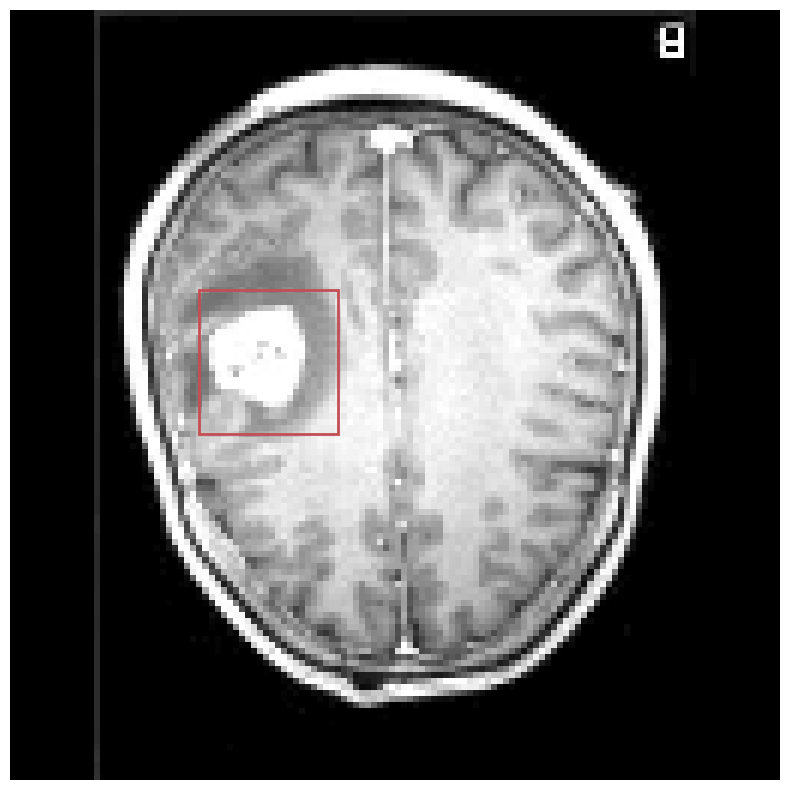

In [ ]:
fig = plt.figure(figsize=[10, 10])

xy = (val_full_bb[3][0]*128, val_full_bb[3][1]*128)
width = val_full_bb[3][2] * 128
height = val_full_bb[3][3] * 128

rect = matplotlib.patches.Rectangle(xy, width, height, linewidth=2, edgecolor='r', facecolor='none')

plt.gca().add_patch(rect)
plt.imshow(val_full[3].reshape(128,128), cmap='gray')
plt.xticks([])
plt.yticks([])

In [ ]:
fig.savefig(r'/content/drive/My Drive/ECE539_project/data/figures/brain_ex.png')

validation set visualization

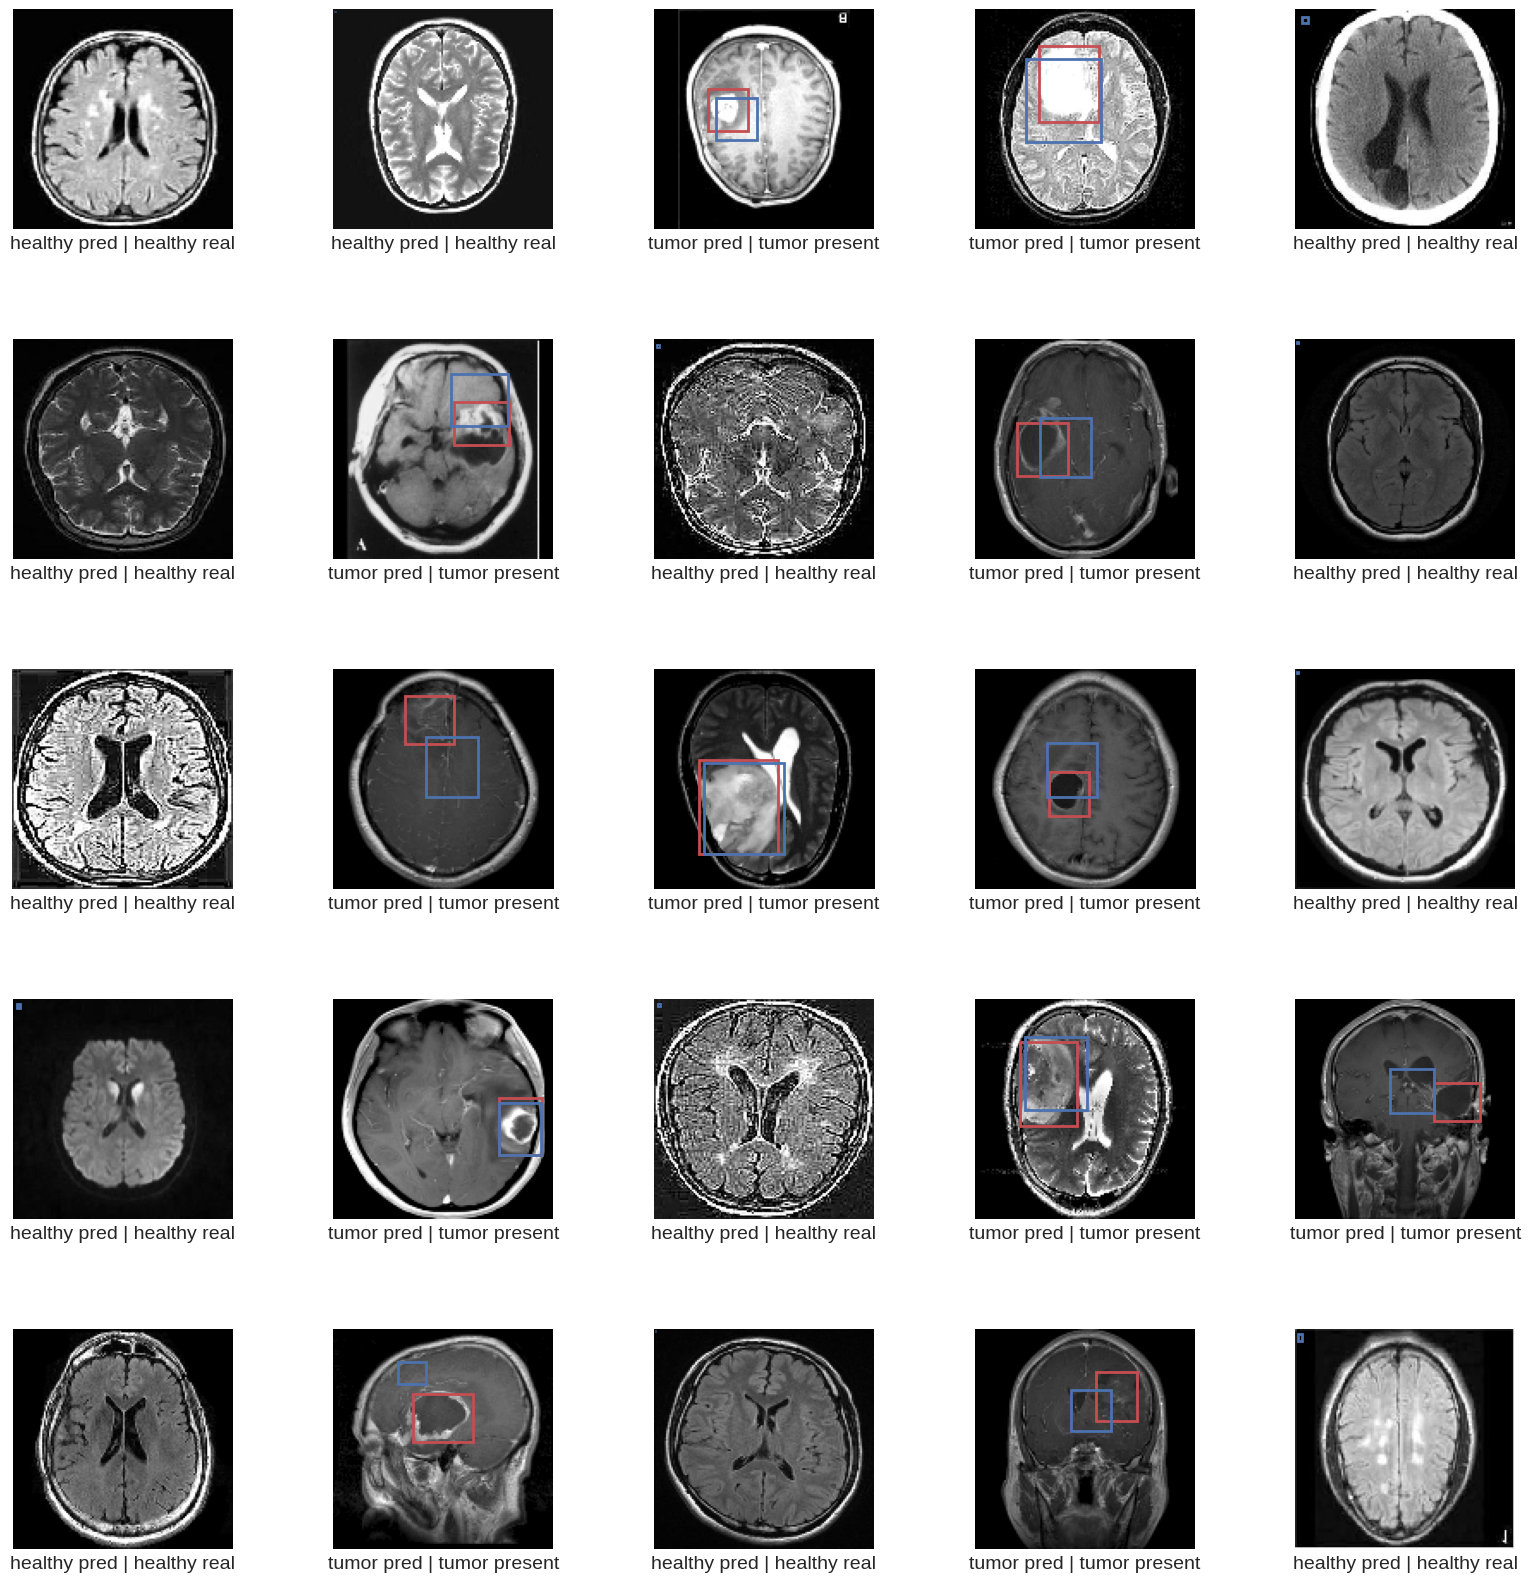

In [ ]:
fig = plt.figure(figsize=[20, 20])
fig.patch.set_facecolor('white')
for i in range(1, 26):
    plt.subplot(5, 5, i)
    rand_pick = random.randint(1, 950)
    random_img = str(rand_pick)

    xy = (val_full_bb[i][0]*128, val_full_bb[i][1]*128)
    width = val_full_bb[i][2] * 128
    height = val_full_bb[i][3] * 128

    xy_pred = (val_full_pred[1][i][0]*128, val_full_pred[1][i][1]*128)
    width_pred = val_full_pred[1][i][2] * 128
    height_pred = val_full_pred[1][i][3] * 128

    img = np.array(val_full[i]).reshape(128,128) * 255
    rect = matplotlib.patches.Rectangle(xy, width, height, linewidth=2, edgecolor='r', facecolor='none')
    rect_pred = matplotlib.patches.Rectangle(xy_pred, width_pred, height_pred, linewidth=2, edgecolor='b', facecolor='none')

    plt.imshow(img, cmap='gray')
    plt.gca().add_patch(rect)
    plt.gca().add_patch(rect_pred)

    plt.xticks([])
    plt.yticks([])

    if np.argmax(val_full_pred[0][i]) == 0 and np.argmax(val_full_labels[i]) == 0:
      plt.xlabel('healthy pred | healthy real', fontsize=14)
    if np.argmax(val_full_pred[0][i]) == 0 and np.argmax(val_full_labels[i]) == 1:
      plt.xlabel('healthy pred | tumor present', fontsize=14)
    if np.argmax(val_full_pred[0][i]) == 1 and np.argmax(val_full_labels[i]) == 0:
      plt.xlabel('tumor pred | healthy real', fontsize=14)
    if np.argmax(val_full_pred[0][i]) == 1 and np.argmax(val_full_labels[i]) == 1:
      plt.xlabel('tumor pred | tumor present', fontsize=14)

fig.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
fig.savefig(r'/content/drive/My Drive/ECE539_project/data/figures/bb_val.png')

test set visualization

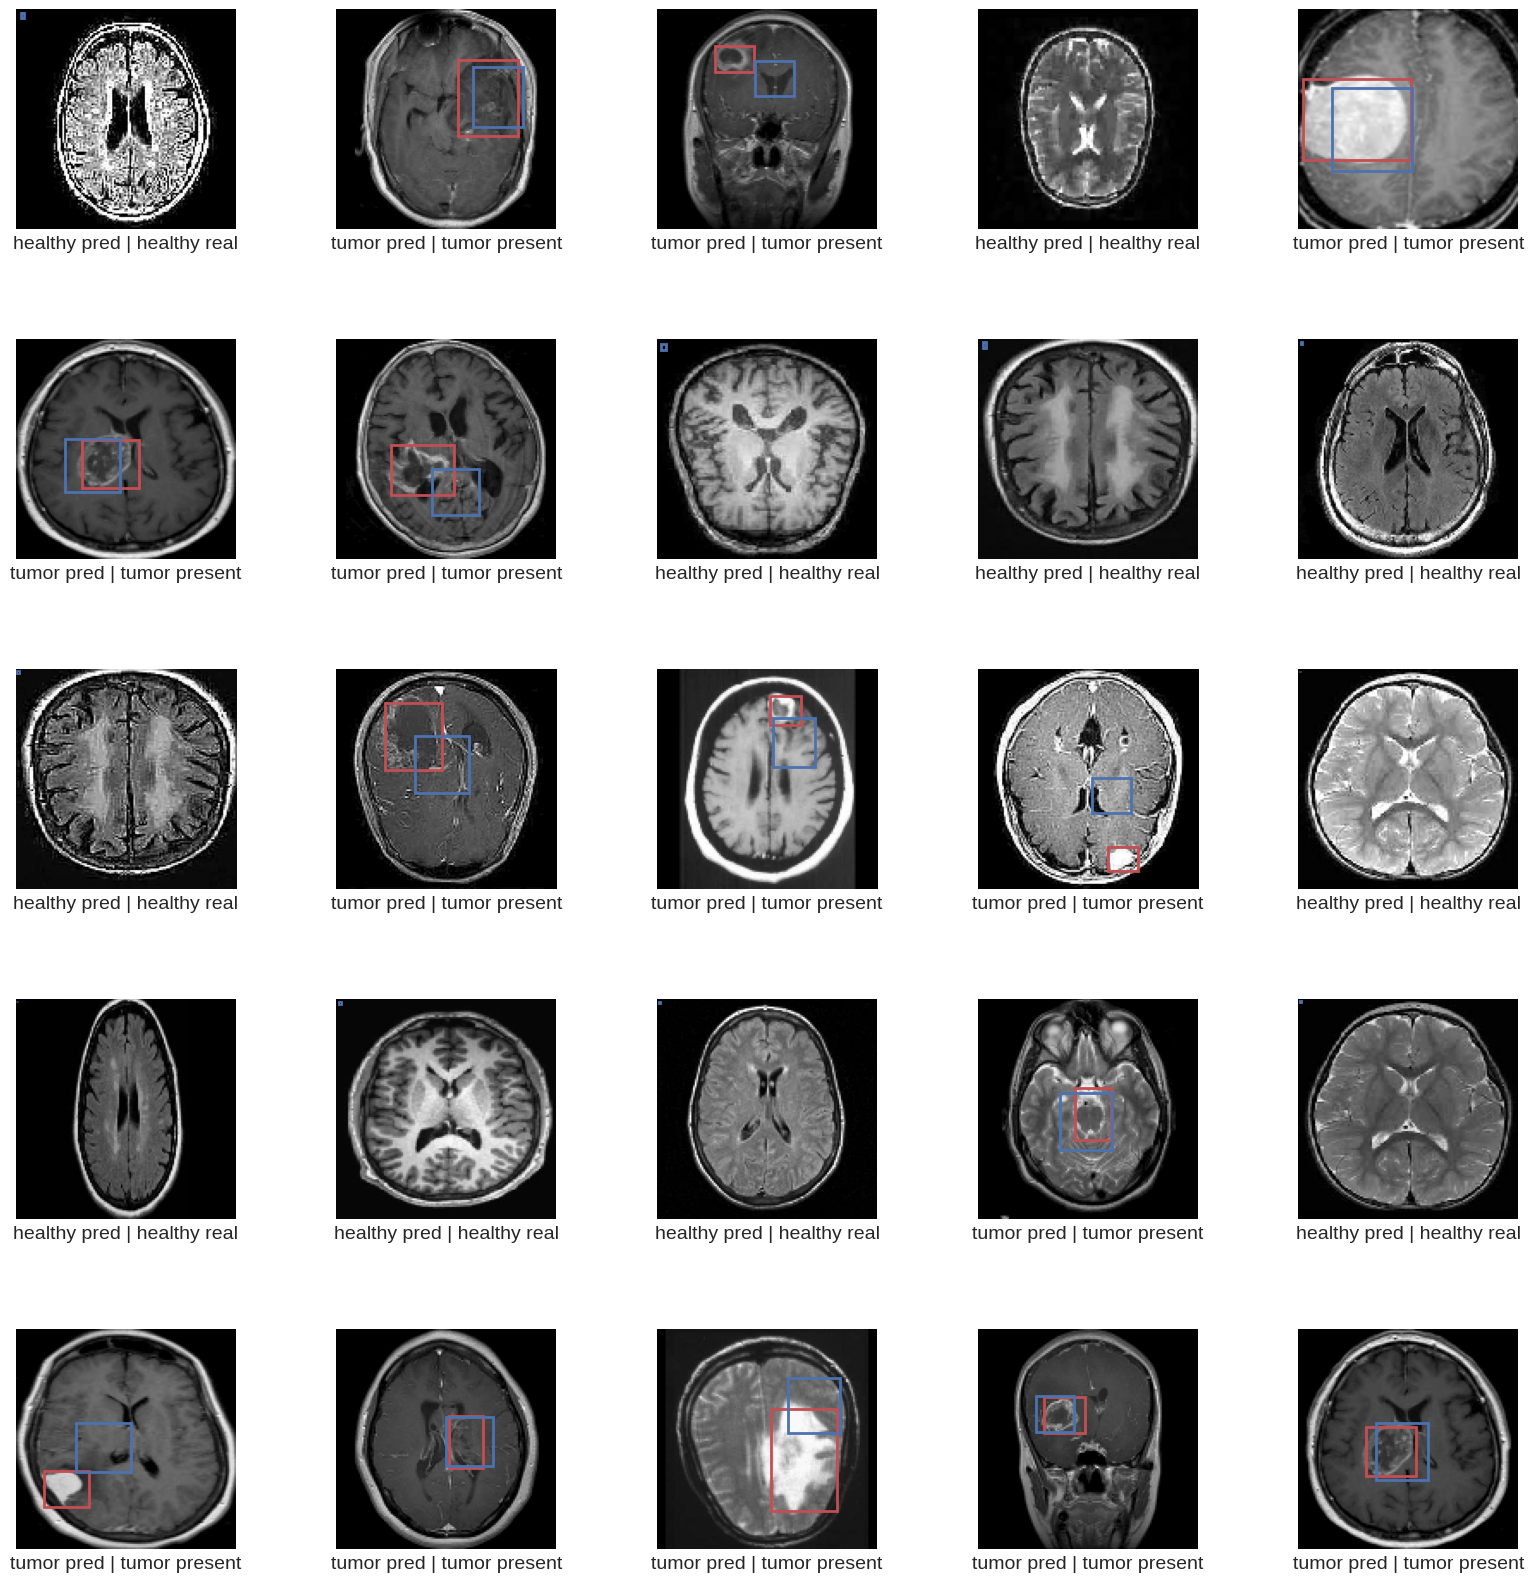

In [ ]:
fig = plt.figure(figsize=[20, 20])
fig.patch.set_facecolor('white')
for i in range(1, 26):
    plt.subplot(5, 5, i)
    rand_pick = random.randint(1, 950)
    random_img = str(rand_pick)

    xy = (test_full_bb[i][0]*128, test_full_bb[i][1]*128)
    width = test_full_bb[i][2] * 128
    height = test_full_bb[i][3] * 128

    xy_pred = (test_full_pred[1][i][0]*128, test_full_pred[1][i][1]*128)
    width_pred = test_full_pred[1][i][2] * 128
    height_pred = test_full_pred[1][i][3] * 128

    img = np.array(test_full[i]).reshape(128,128) * 255
    rect = matplotlib.patches.Rectangle(xy, width, height, linewidth=2, edgecolor='r', facecolor='none')
    rect_pred = matplotlib.patches.Rectangle(xy_pred, width_pred, height_pred, linewidth=2, edgecolor='b', facecolor='none')

    plt.imshow(img, cmap='gray')
    plt.gca().add_patch(rect)
    plt.gca().add_patch(rect_pred)

    plt.xticks([])
    plt.yticks([])

    if np.argmax(test_full_pred[0][i]) == 0 and np.argmax(test_full_labels[i]) == 0:
      plt.xlabel('healthy pred | healthy real', fontsize=14)
    if np.argmax(test_full_pred[0][i]) == 0 and np.argmax(test_full_labels[i]) == 1:
      plt.xlabel('healthy pred | tumor present', fontsize=14)
    if np.argmax(test_full_pred[0][i]) == 1 and np.argmax(test_full_labels[i]) == 0:
      plt.xlabel('tumor pred | healthy real', fontsize=14)
    if np.argmax(test_full_pred[0][i]) == 1 and np.argmax(test_full_labels[i]) == 1:
      plt.xlabel('tumor pred | tumor present', fontsize=14)

fig.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
fig.savefig(r'/content/drive/My Drive/ECE539_project/data/figures/bb_test.png')

test data tumors only

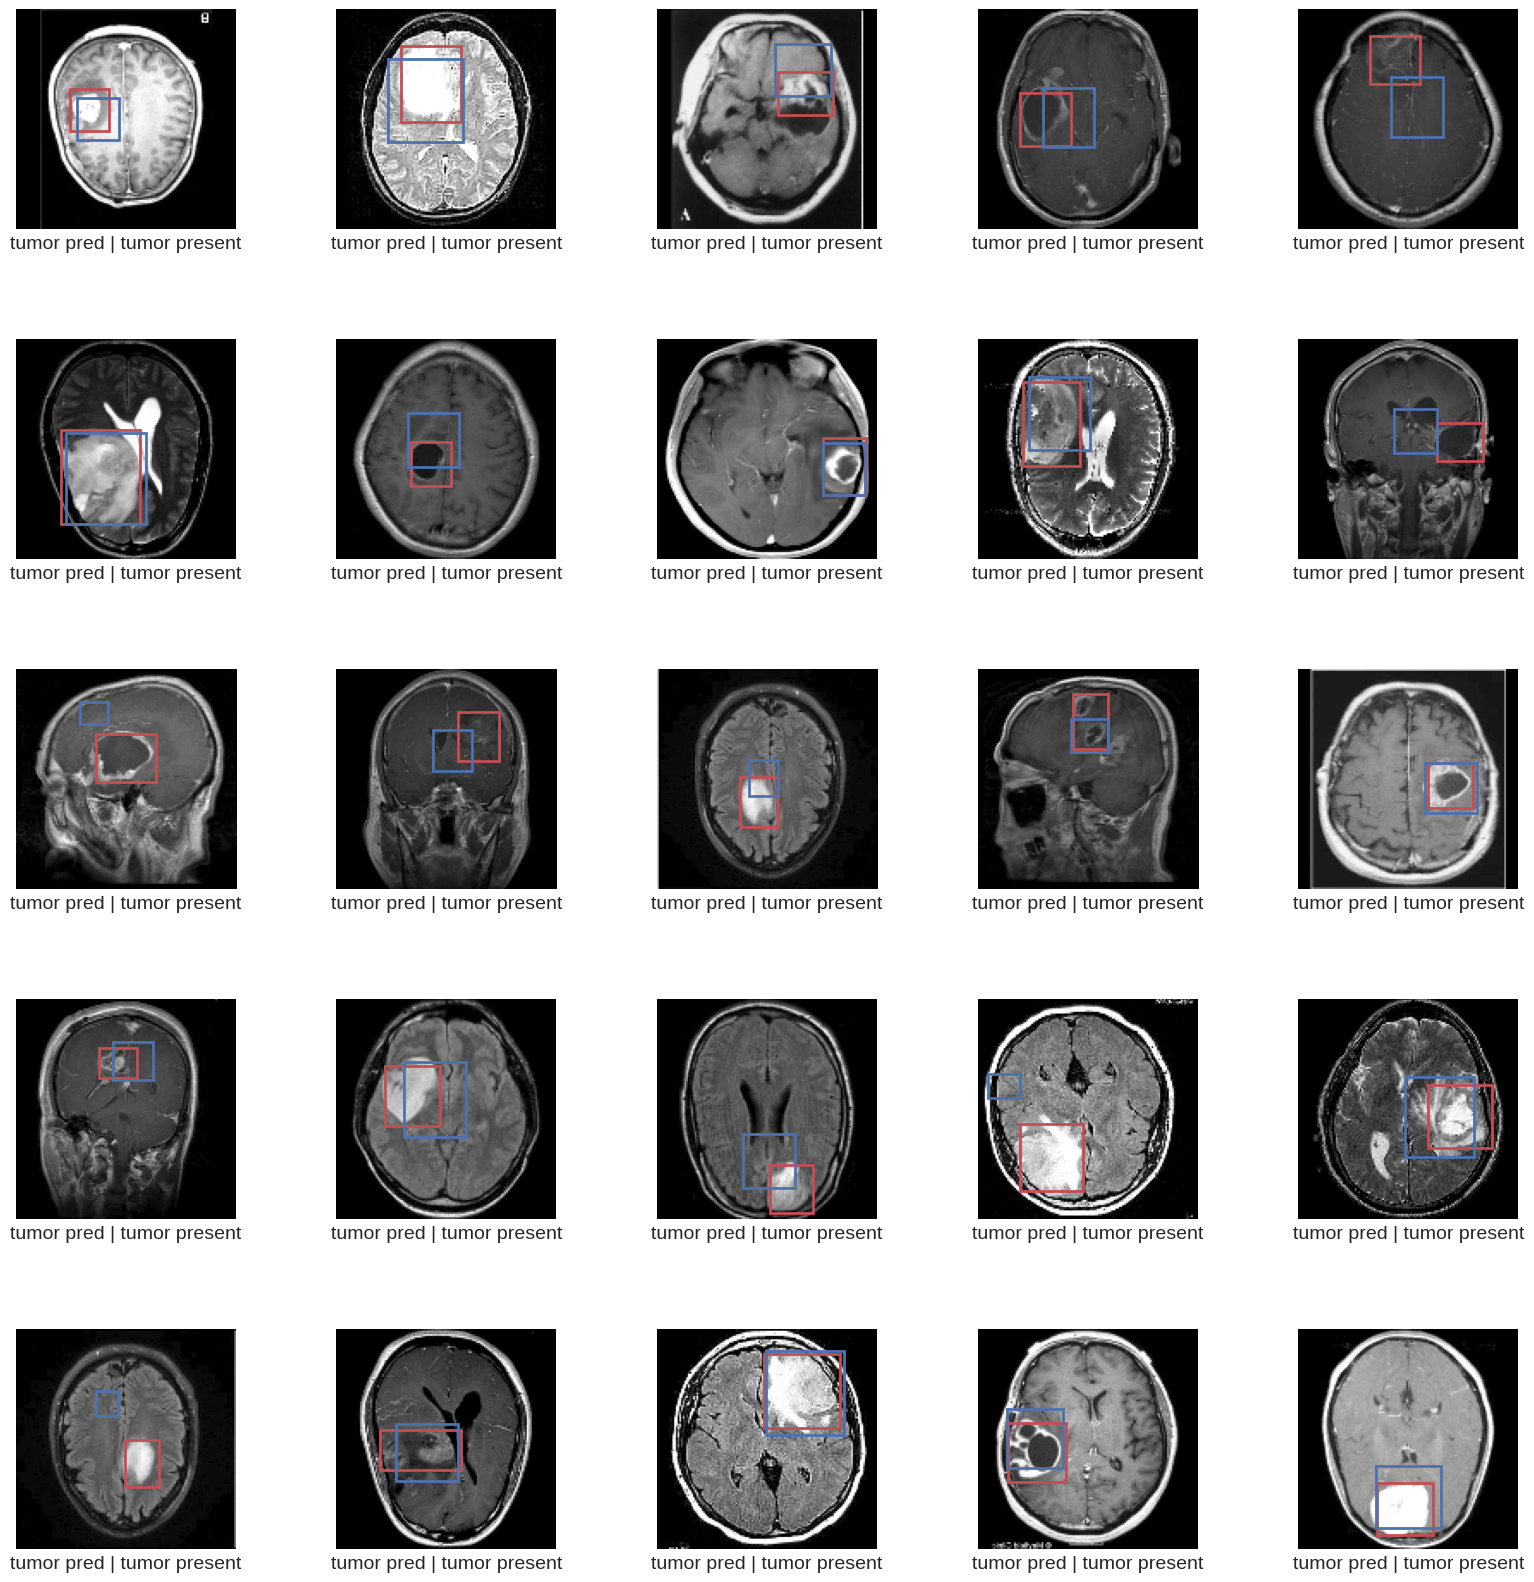

In [ ]:
fig = plt.figure(figsize=[20, 20])
fig.patch.set_facecolor('white')
tumor_counter = 0
for i in range(1, 26):
    plt.subplot(5, 5, i)

    while np.argmax(val_full_labels[tumor_counter]) == 0: # no tumor
      tumor_counter+=1
    else:

      xy = (val_full_bb[tumor_counter][0]*128, val_full_bb[tumor_counter][1]*128)
      width = val_full_bb[tumor_counter][2] * 128
      height = val_full_bb[tumor_counter][3] * 128

      xy_pred = (val_full_pred[1][tumor_counter][0]*128, val_full_pred[1][tumor_counter][1]*128)
      width_pred = val_full_pred[1][tumor_counter][2] * 128
      height_pred = val_full_pred[1][tumor_counter][3] * 128

      img = np.array(val_full[tumor_counter]).reshape(128,128) * 255
      rect = matplotlib.patches.Rectangle(xy, width, height, linewidth=2, edgecolor='r', facecolor='none')
      rect_pred = matplotlib.patches.Rectangle(xy_pred, width_pred, height_pred, linewidth=2, edgecolor='b', facecolor='none')

      plt.imshow(img, cmap='gray')
      plt.gca().add_patch(rect)
      plt.gca().add_patch(rect_pred)

      plt.xticks([])
      plt.yticks([])

      if np.argmax(val_full_pred[0][tumor_counter]) == 0 and np.argmax(val_full_labels[tumor_counter]) == 0:
        plt.xlabel('healthy pred | healthy real', fontsize=14)
      if np.argmax(val_full_pred[0][tumor_counter]) == 0 and np.argmax(val_full_labels[tumor_counter]) == 1:
        plt.xlabel('healthy pred | tumor present', fontsize=14)
      if np.argmax(val_full_pred[0][tumor_counter]) == 1 and np.argmax(val_full_labels[tumor_counter]) == 0:
        plt.xlabel('tumor pred | healthy real', fontsize=14)
      if np.argmax(val_full_pred[0][tumor_counter]) == 1 and np.argmax(val_full_labels[tumor_counter]) == 1:
        plt.xlabel('tumor pred | tumor present', fontsize=14)

      tumor_counter+=1

fig.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
fig.savefig(r'/content/drive/My Drive/ECE539_project/data/figures/bb_val_tumors_only.png')

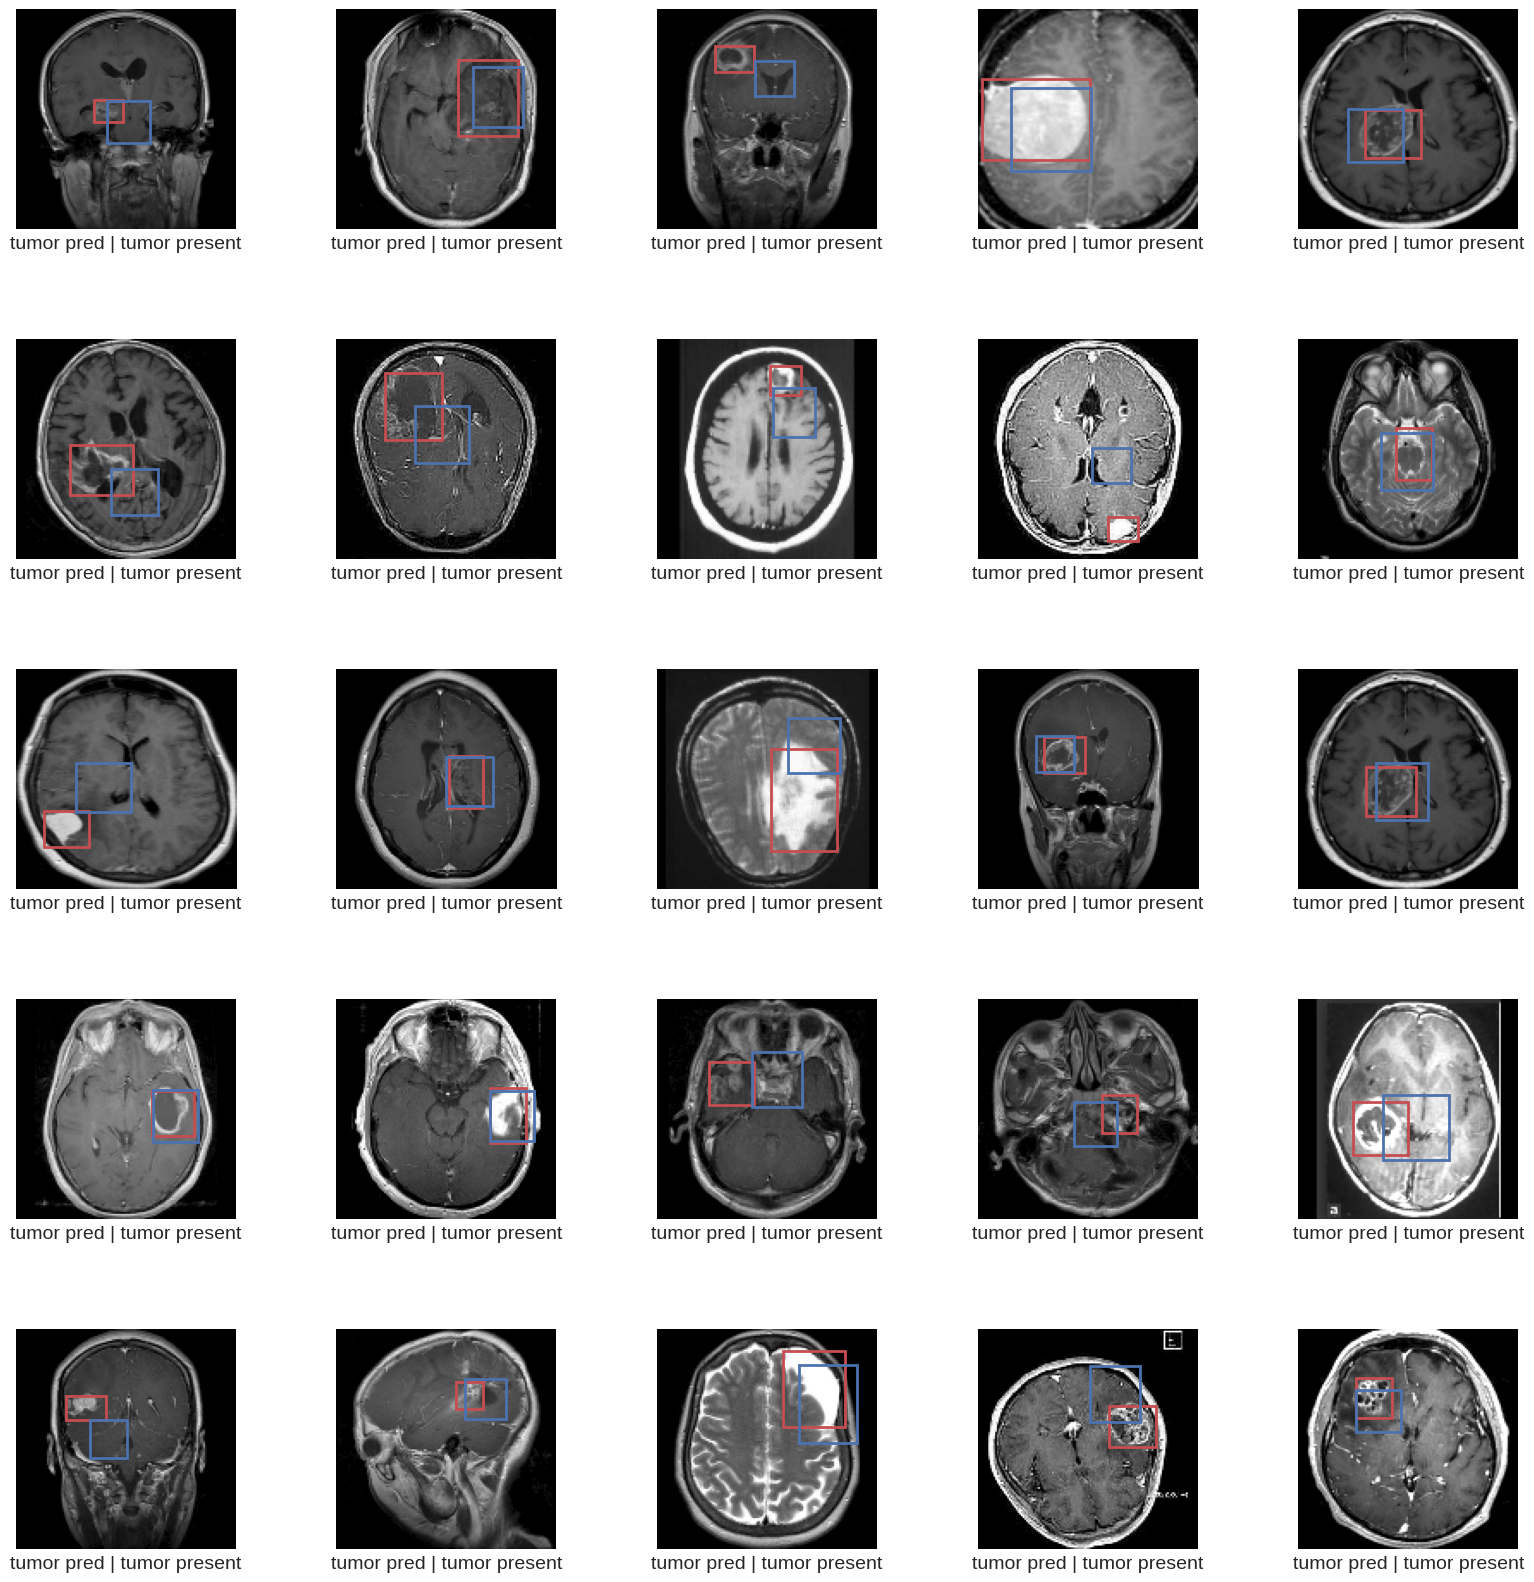

In [ ]:
fig = plt.figure(figsize=[20, 20])
fig.patch.set_facecolor('white')
tumor_counter = 0
for i in range(1, 26):
    plt.subplot(5, 5, i)

    while np.argmax(test_full_labels[tumor_counter]) == 0: # no tumor
      tumor_counter+=1
    else:

      xy = (test_full_bb[tumor_counter][0]*128, test_full_bb[tumor_counter][1]*128)
      width = test_full_bb[tumor_counter][2] * 128
      height = test_full_bb[tumor_counter][3] * 128

      xy_pred = (test_full_pred[1][tumor_counter][0]*128, test_full_pred[1][tumor_counter][1]*128)
      width_pred = test_full_pred[1][tumor_counter][2] * 128
      height_pred = test_full_pred[1][tumor_counter][3] * 128

      img = np.array(test_full[tumor_counter]).reshape(128,128) * 255
      rect = matplotlib.patches.Rectangle(xy, width, height, linewidth=2, edgecolor='r', facecolor='none')
      rect_pred = matplotlib.patches.Rectangle(xy_pred, width_pred, height_pred, linewidth=2, edgecolor='b', facecolor='none')

      plt.imshow(img, cmap='gray')
      plt.gca().add_patch(rect)
      plt.gca().add_patch(rect_pred)

      plt.xticks([])
      plt.yticks([])

      if np.argmax(test_full_pred[0][tumor_counter]) == 0 and np.argmax(test_full_labels[tumor_counter]) == 0:
        plt.xlabel('healthy pred | healthy real', fontsize=14)
      if np.argmax(test_full_pred[0][tumor_counter]) == 0 and np.argmax(test_full_labels[tumor_counter]) == 1:
        plt.xlabel('healthy pred | tumor present', fontsize=14)
      if np.argmax(test_full_pred[0][tumor_counter]) == 1 and np.argmax(test_full_labels[tumor_counter]) == 0:
        plt.xlabel('tumor pred | healthy real', fontsize=14)
      if np.argmax(test_full_pred[0][tumor_counter]) == 1 and np.argmax(test_full_labels[tumor_counter]) == 1:
        plt.xlabel('tumor pred | tumor present', fontsize=14)

      tumor_counter+=1

fig.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
fig.savefig(r'/content/drive/My Drive/ECE539_project/data/figures/bb_test_tumors_only.png')

# Model verification and Testing

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.style.use("seaborn-darkgrid")

loss and accuracy plots [train, val]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


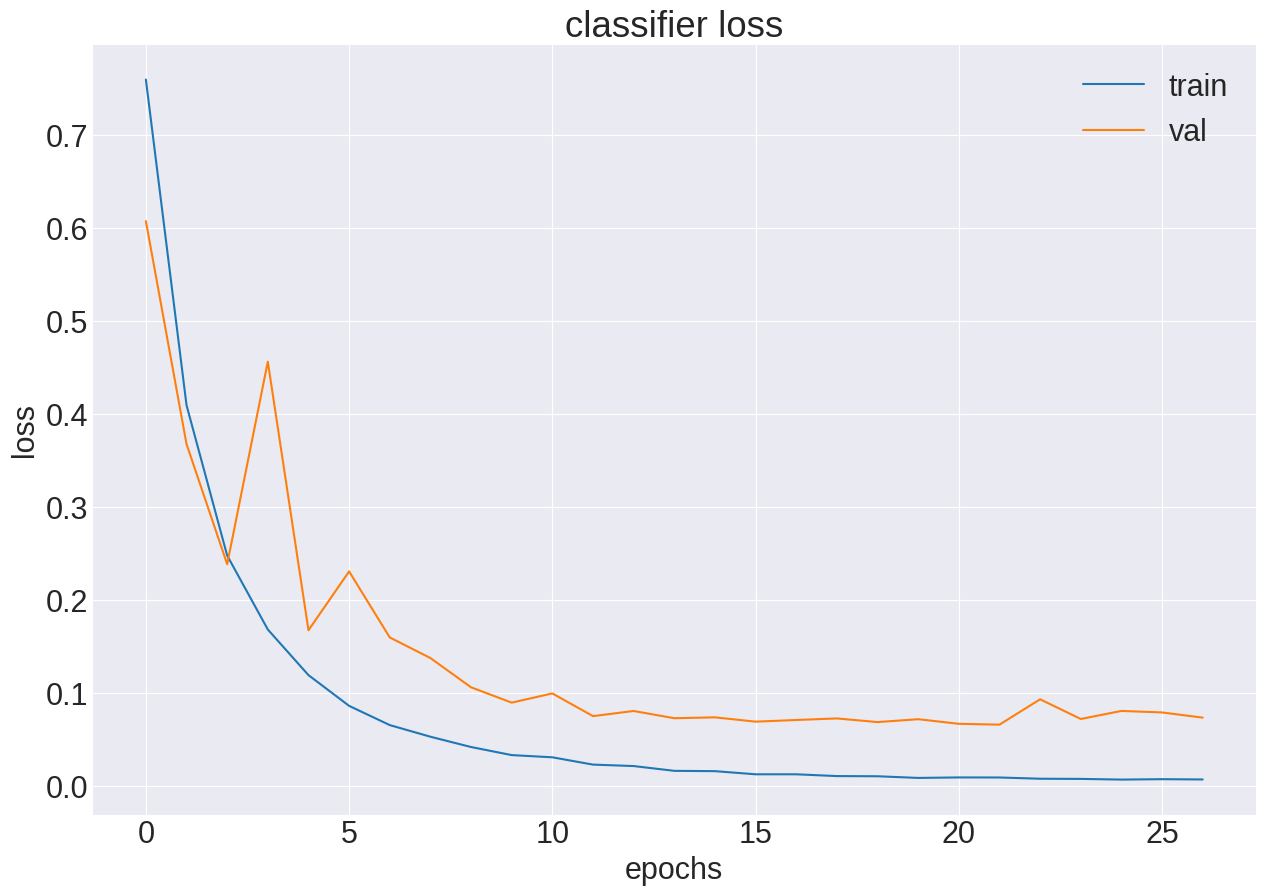

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(range(len(history_class_dict['cl_head_loss'])), history_class_dict['cl_head_loss'])
sns.lineplot(range(len(history_class_dict['val_cl_head_loss'])), history_class_dict['val_cl_head_loss'])

plt.title('classifier loss')
plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')
# plt.set_facecolor((1.0, 1.0, 1.0))
matplotlib.rcParams.update({'font.size': 22})

fig.savefig(r'/content/drive/My Drive/ECE539_project/data/figures/cl_loss_tr_val.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


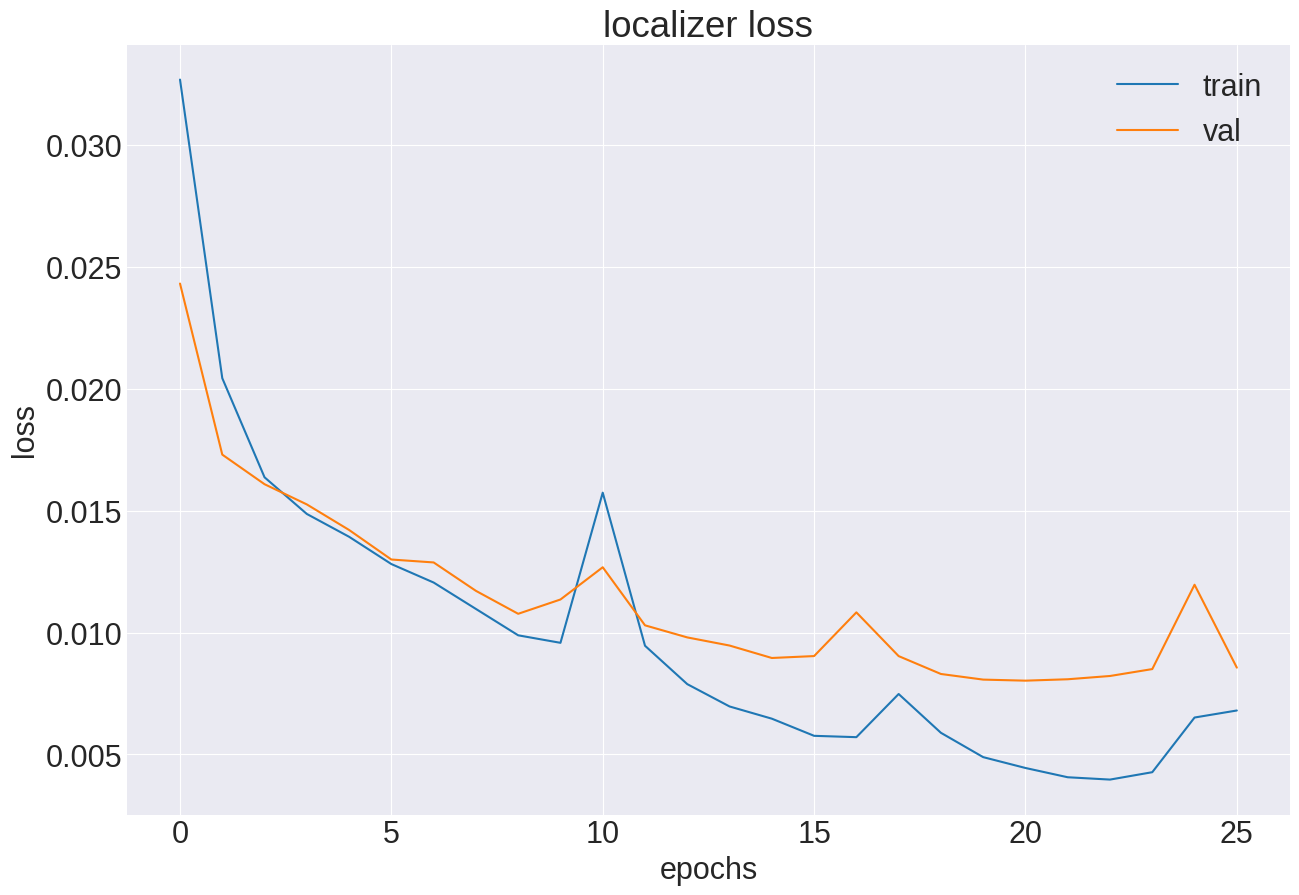

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(range(len(history_loc_dict['bb_head_loss'])), history_loc_dict['bb_head_loss'])
sns.lineplot(range(len(history_loc_dict['val_bb_head_loss'])), history_loc_dict['val_bb_head_loss'])

plt.title('localizer loss')
plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')
matplotlib.rcParams.update({'font.size': 22})

fig.savefig(r'/content/drive/My Drive/ECE539_project/data/figures/bb_loss_tr_val.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


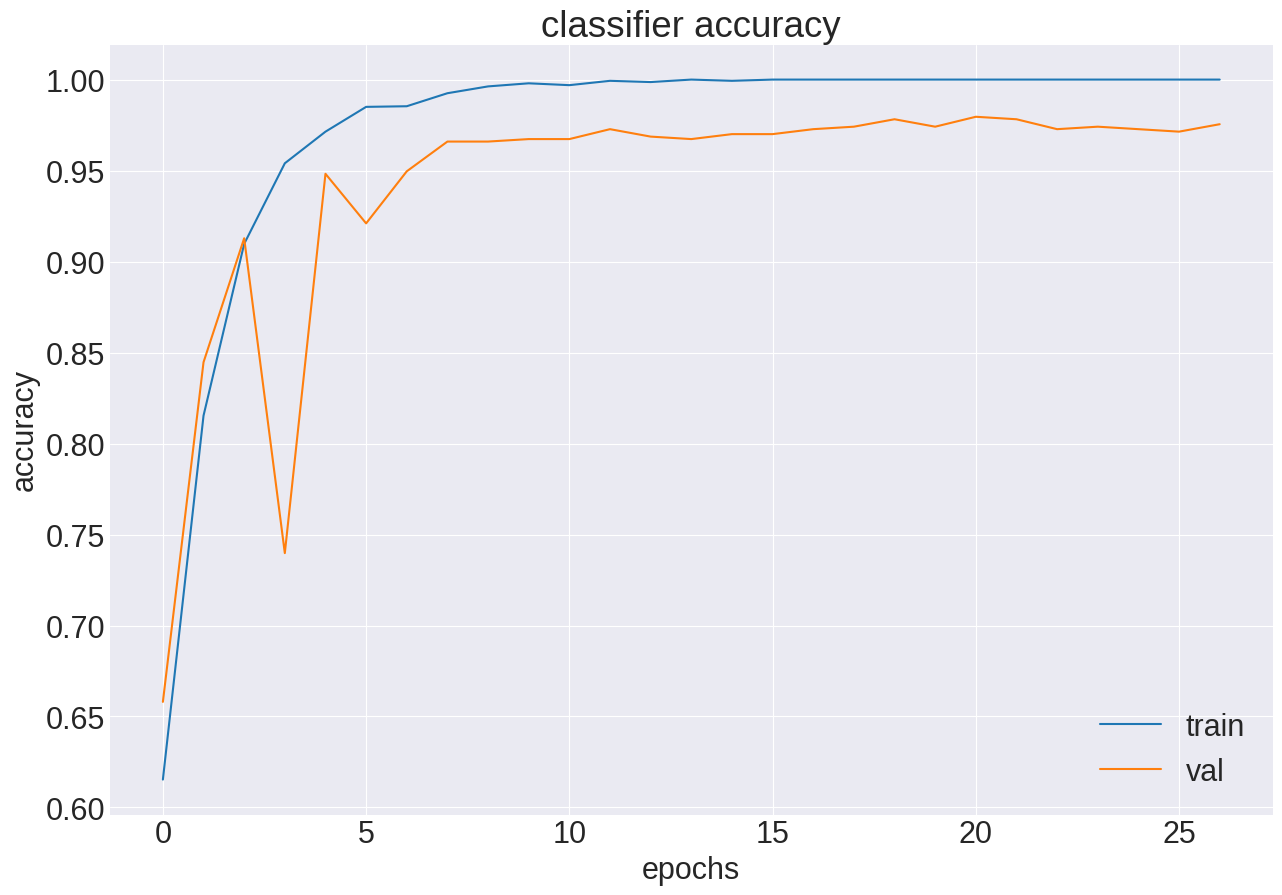

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(range(len(history_class_dict['cl_head_accuracy'])), history_class_dict['cl_head_accuracy'])
sns.lineplot(range(len(history_class_dict['val_cl_head_accuracy'])), history_class_dict['val_cl_head_accuracy'])

plt.title('classifier accuracy')
plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.set_facecolor((1.0, 1.0, 1.0))
matplotlib.rcParams.update({'font.size': 22})

fig.savefig(r'/content/drive/My Drive/ECE539_project/data/figures/cl_acc_tr_val.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


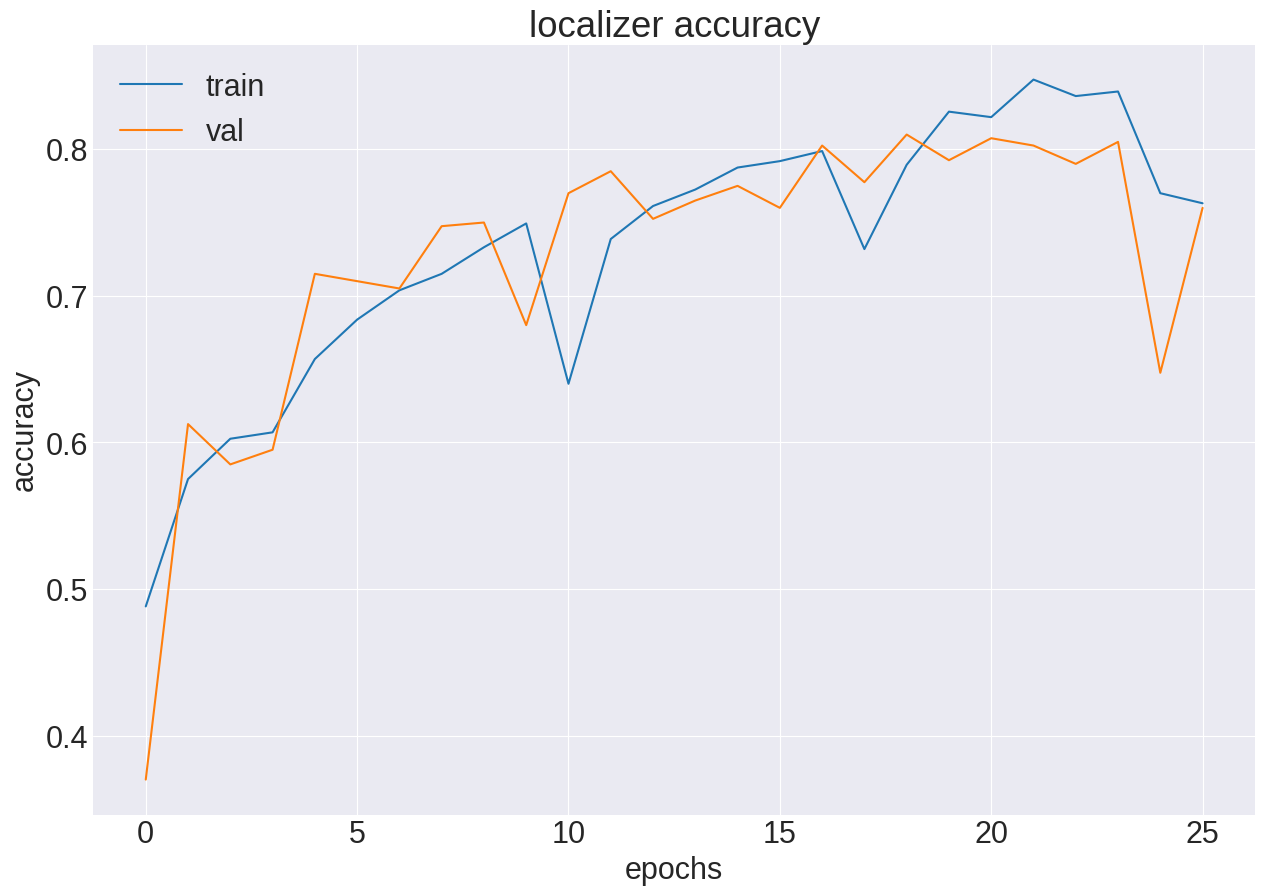

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(range(len(history_loc_dict['bb_head_accuracy'])), history_loc_dict['bb_head_accuracy'])
sns.lineplot(range(len(history_loc_dict['val_bb_head_accuracy'])), history_loc_dict['val_bb_head_accuracy'])

plt.title('localizer accuracy')
plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
matplotlib.rcParams.update({'font.size': 22})

fig.savefig(r'/content/drive/My Drive/ECE539_project/data/figures/bb_acc_tr_val.png')

confusion matrices

In [ ]:
cm_train_class = confusion_matrix(np.argmax(train_full_labels, axis=1), np.argmax(train_full_pred[0], axis=1))
cm_val_class = confusion_matrix(np.argmax(val_full_labels, axis=1), np.argmax(val_full_pred[0], axis=1))
cm_test_class = confusion_matrix(np.argmax(test_full_labels, axis=1), np.argmax(test_full_pred[0], axis=1))

In [ ]:
cms = [cm_train_class, cm_val_class, cm_test_class]
cms_titles = ['train', 'validation', 'test']

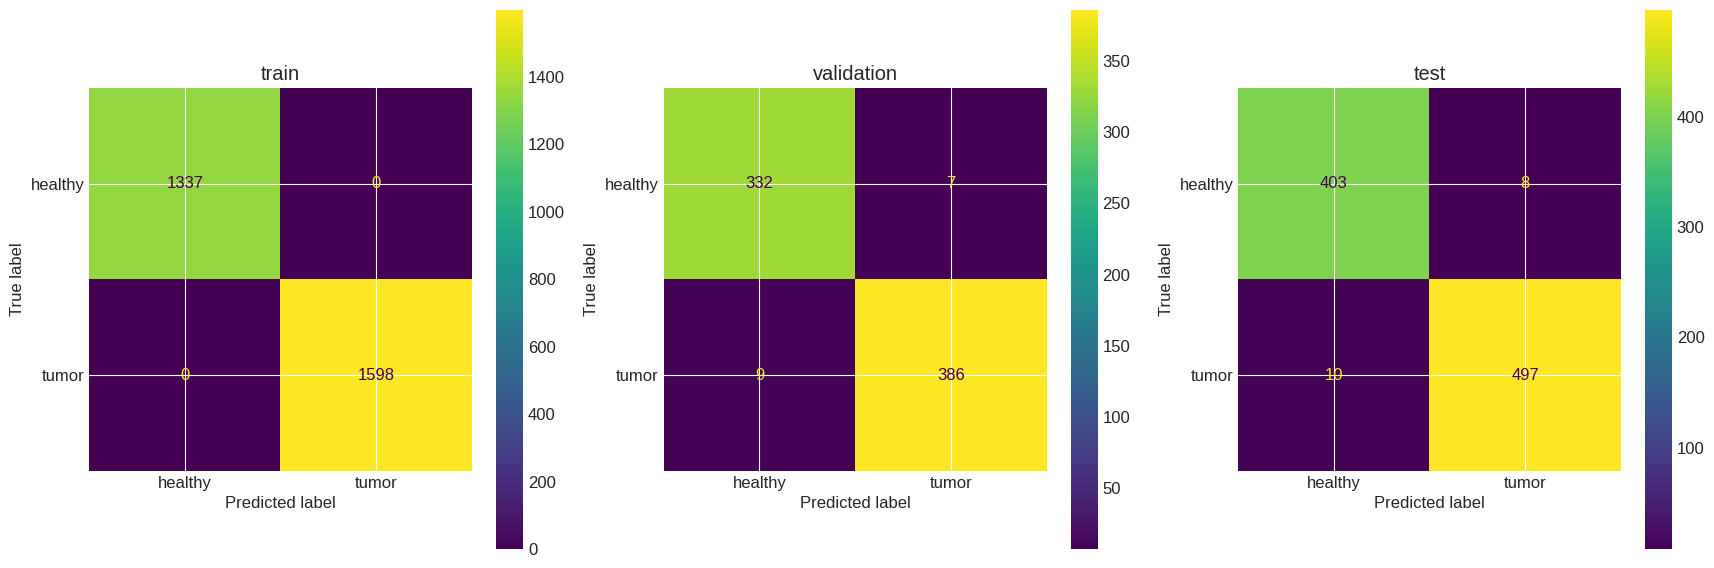

In [ ]:
f = plt.figure(figsize=(21,7))
for i in range(3):
  ax = f.add_subplot(1,3,i+1)
  ConfusionMatrixDisplay(cms[i], display_labels = ['healthy', 'tumor']).plot(ax=ax)
  plt.title(cms_titles[i])
  matplotlib.rcParams.update({'font.size': 12})


In [ ]:
f.savefig(r'/content/drive/My Drive/ECE539_project/data/figures/cm_tr_val_test.png')

In [ ]:
model_eval_score = model.evaluate(test_tumors, testTumorsTargets)#, batch_size=128) # inputs to eval, expected results, batch size not for Sequence

print("\nTest classification loss:", model_eval_score[1])
print("Test classification accuracy:", model_eval_score[-2])
print("\nTest localization loss:", model_eval_score[2])
print("Test localization accuracy:", model_eval_score[-1])

16/16 [==============================] - 5s 259ms/step - loss: 0.0207 - cl_head_loss: 0.0164 - bb_head_loss: 0.0043 - cl_head_accuracy: 0.9940 - bb_head_accuracy: 0.8440

Test classification loss: 0.016378501430153847
Test classification accuracy: 0.9940000176429749

Test localization loss: 0.004300580359995365
Test localization accuracy: 0.843999981880188


In [ ]:
model_eval_score = model.evaluate(train_full, trainFullTargets)#, batch_size=128) # inputs to eval, expected results, batch size not for Sequence

print("\ntrain classification loss:", model_eval_score[1])
print("train classification accuracy:", model_eval_score[-2])
print("\ntrain localization loss:", model_eval_score[2])
print("train localization accuracy:", model_eval_score[-1])

92/92 [==============================] - 29s 308ms/step - loss: 0.0030 - cl_head_loss: 0.0021 - bb_head_loss: 9.2705e-04 - cl_head_accuracy: 1.0000 - bb_head_accuracy: 0.5595

train classification loss: 0.002055997960269451
train classification accuracy: 1.0

train localization loss: 0.0009270527516491711
train localization accuracy: 0.5594548583030701


In [ ]:
model_eval_score = model.evaluate(val_full, valFullTargets)#, batch_size=128) # inputs to eval, expected results, batch size not for Sequence

print("\nval classification loss:", model_eval_score[1])
print("val classification accuracy:", model_eval_score[-2])
print("\nval localization loss:", model_eval_score[2])
print("val localization accuracy:", model_eval_score[-1])

23/23 [==============================] - 6s 274ms/step - loss: 0.0707 - cl_head_loss: 0.0660 - bb_head_loss: 0.0046 - cl_head_accuracy: 0.9782 - bb_head_accuracy: 0.5409

val classification loss: 0.06604933738708496
val classification accuracy: 0.9782016277313232

val localization loss: 0.0046127256937325
val localization accuracy: 0.5408719182014465
